# Linear Model of Regression

## Linear Basis Function Model
Linear Model is the most simple model of input
$$y(\mathbf{x, w}) = \sum_{i = 0}^D w_i x_i = \mathbf{w}^T\mathbf{x}$$

which can be expanded by using basis functions

$$y(\mathbf{x, w}) = \mathbf{w}^T\mathbf{\phi(\mathbf{x})}$$

There are several common choice of basis functions:
* **Gaussian:** $\phi_j(x) = \exp\left\{-\frac{(x - \mu_j)^2}{2s^2}\right\}$
* **Sigmoid:** $\phi_j(x) = \frac{1}{1 + \exp(-\frac{x - \mu_j}{s})}$
* **Polynomial:** $\phi_j(x) = x^j$


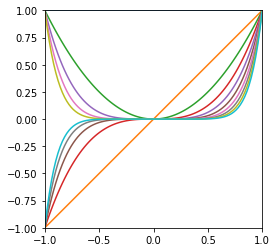

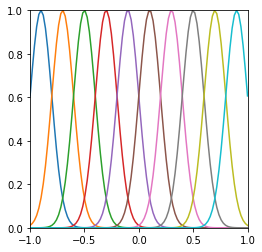

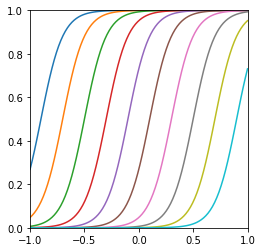

In [42]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
def poly(x, i):
    return x**i
def sigmoid(x, mu, s):
    return 1 / (1 + np.exp(-((x - mu)/(s))))
def gaussian(x, mu, s):
    return np.exp(-((x - mu) ** 2/(2*s**2)))
x = np.linspace(-1, 1, 100)
plt.figure(0)
for i in range(10):
    plt.plot(x, poly(x, i))
plt.xlim(-1, 1)
plt.ylim(-1, 1)
plt.axes().set_aspect('equal')
plt.figure(1)
for i in range(10):
    plt.plot(x, gaussian(x, 0.2*i - 0.9, 0.1))
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.axes().set_aspect(2)
plt.figure(2)
for i in range(10):
    plt.plot(x, sigmoid(x, 0.2*i - 0.9, 0.1))
plt.xlim(-1, 1)
plt.ylim(0, 1)
plt.axes().set_aspect(2)

### Maximum Likelihood and least squares

Suppose our target variable $t = y(\mathbf{x, w}) + \epsilon$, in which $\epsilon$ follows Gaussian distribution with expectation to be $0$. 

So $p(\mathbf{t} \mid \mathbf{x, w}, \beta) = \mathcal{N}(t \mid y(\mathbf{x, w}), \beta^{-1})$

then

$$\mathbb{E}[t \mid \mathbf{x}] = \int tp(t \mid \mathbf{x}) = y(\mathbf{x, w})$$

Consider dataset $\mathcal = \{(x_i, t_i) \mid i = 1, 2, \cdots, N\}$, then we have likelihood function 
$$p(\mathbf{t} \mid \mathbf{X, w}, \beta) = \prod_{n = 1}^N \mathcal{N}(t_n \mid \mathbf{w}^T\phi(\mathbf{x}_n), \beta^{-1})$$

Define $$E_D(\mathbf{w}) = \frac{1}{2}\sum_{n = 1}^N \{t_n - \mathbf{w}^T\phi(\mathbf{x}_n)\}^2$$

so 
    \begin{align}
        &\ln p(\mathbf{t} \mid \mathbf{X, w}, \beta) = \sum_{n = 1}^N \ln \mathcal{N}(t_n \mid \mathbf{w}^T\phi(\mathbf{x}_n), \beta^{-1})\nonumber\\
        &\phantom{\ln p(\mathbf{t} \mid \mathbf{X, w}, \beta)} = \frac{N}{2} \ln \beta - \frac{N}{2}\ln(2\pi) - \beta E_D(\mathbf{w})\nonumber
    \end{align}
    
and solve $$\nabla (\ln \beta - \frac{N}{2}\ln(2\pi) - \beta E_D(\mathbf{w})) = \beta \sum_{n = 1}^N \{t_n - \mathbf{w}^T\phi(\mathbf{x}_n)\}\phi(\mathbf{x}_n)^T = 0$$

We get $\mathbf{w}_{ML} = (\Phi^T\Phi)^{-1}\Phi^T\mathbf{t}$, in which $\Phi$ is the **generalized Vandermonde matrix**. We say that $\Phi^{\dagger} = (\Phi^T\Phi)^{-1}\Phi^T$ is the **pseudo-inverse matrix** of $\Phi$.

And $$\frac{1}{\beta_{ML}} = \frac{1}{N}\sum_{n = 1}^N \{t_n - \mathbf{w}^T_{ML}\phi(x_n)\}^2$$

### Sequential Learning 
When the size of dataset is too large, doing maximum likelihood approximation on the entire dataset requires large amount of calculation. Then we may want to use online algorithm to make predictions.

One of the most known online algorithm is SGD (**stochastic gradient descent**)
    $$\mathbf{w}^{(\tau + 1)} = \mathbf{w}^{(\tau)} - \eta\nabla E_n = \mathbf{w}^{(\tau)} - \eta(t_n - \mathbf{w}^{(\tau)T}\phi_n)\phi_n$$
    
this algorithm is also called **LMS (least-mean-squares)** algorithm.

In order to prevent overfitting, we can use regularization then the error function become
$$E(\mathbf{w}) = E_D(\mathbf{w}) + \lambda E_W(\mathbf{w})$$

with $$E_{W}(\mathbf{w}) = \frac{1}{2}\mathbf{w}^T\mathbf{w}$$

Consider $$E_D(\mathbf{w}) = \frac{1}{2}\sum_{n = 1}^N \{t_n - \mathbf{w}^T\phi(\mathbf{x}_n)\}^2$$

then
$$E(\mathbf{w}) = \frac{1}{2}\mathbf{w}^T\mathbf{w} + \frac{1}{2}\sum_{n = 1}^N \{t_n - \mathbf{w}^T\phi(\mathbf{x}_n)\}^2$$

So by solving $$\nabla E(\mathbf{w}) = 0$$

we get $$\mathbf{w} = (\lambda\mathbf{I} + \Phi^T\Phi)^{-1}\Phi^T\mathbf{t}$$

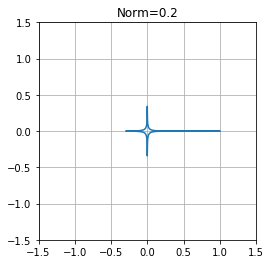

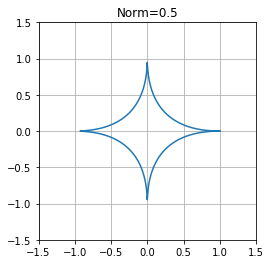

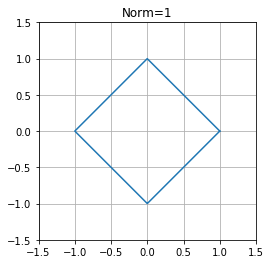

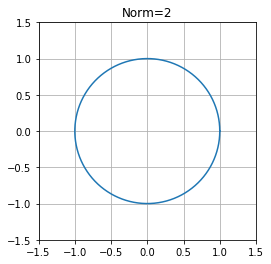

In [3]:
alpha = np.linspace(0, 2*np.pi, 2000, endpoint=True)
x = np.cos(alpha)
y = np.sin(alpha)

vecs = np.array([x,y])
ps = [0.2, 0.5, 1, 2, 5]
for i in range(4):
    plt.figure(i)
    p = ps[i]
    norms = np.sum(np.abs(vecs)**p, axis=0)**(1/p)
    norm_vecs = vecs/norms

    plt.grid()
    plt.gca().set_aspect("equal")
    plt.plot(norm_vecs[0], norm_vecs[1])
    plt.xlim([-1.5, 1.5])
    plt.ylim([-1.5, 1.5])
    plt.title('Norm=' + str(ps[i]))

### Multiple Output
If we model all components of target vectors with the same set of basis functions, then
$$\mathbf{y}(\mathbf{x, w}) = \mathbf{W}^T\phi(\mathbf{x})$$

then suppose $$p(\mathbf{t} \mid \mathbf{x, W}, \beta) = \mathcal{N}(\mathbf{t} \mid \mathbf{W}^T\phi(x), \beta^{-1}\mathbf{I})$$

so 
    \begin{align}
        &\ln p(\mathbf{T} \mid \mathbf{X, W}, \beta) = \sum_{n = 1}^N \ln \mathcal{N}(\mathbf{t} \mid \mathbf{W}^T\phi(x), \beta^{-1}\mathbf{I})\nonumber\\
        &\phantom{\ln p(\mathbf{T} \mid \mathbf{X, W}, \beta)} = \frac{NK}{2}\ln \left(\frac{\beta}{2\pi}\right) - \frac{\beta}{2}\sum_{n = 1}^N ||\mathbf{t}_n - \mathbf{W}^T\phi(x_n)||^2
    \end{align}
    
Then $$\mathbf{W}_{ML} = (\Phi^T\Phi)^{-1}\Phi^T \mathbf{T}$$ maximize the function.

## The Bias-Variance Decomposition
### Bias-Variance Trade-off

The best prediction is given by $$h(\mathbf{x}) = \mathbb{E}[t \mid \mathbf{x}] = \int tp(t \mid x)dt$$

We also know that 
$$\mathbb{E}[L] = \int \{y(\mathbf{x}) - h(\mathbf{x})\}^2 p(\mathbf{x})d\mathbf{x} + \underbrace{\int\int \{h(\mathbf{x}) - t\}^2 p(\mathbf{x}, t)d\mathbf{x}dt}_{\text{noise}}$$

Consider a specific dataset $\mathcal{D}$, the first term become
$$\{y(\mathbf{x};\mathcal{D}) - h(\mathbf{x})\}^2$$

then $$\{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_D[y(\mathbf{x};\mathcal{D})] + \mathbb{E}_D[y(\mathbf{x};\mathcal{D})] - h(\mathbf{x})\}^2 = \{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_D[y(\mathbf{x};\mathcal{D})]\}^2 + \{\mathbb{E}_D[y(\mathbf{x};\mathcal{D})] - h(\mathbf{x})\}^2 + 2\{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_D[y(\mathbf{x};\mathcal{D})]\}\{\mathbb{E}_D[y(\mathbf{x};\mathcal{D})] - h(\mathbf{x})\}$$

so $$E_D[\{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_D[y(\mathbf{x};\mathcal{D})]\}^2] = \underbrace{\{\mathbb{E}_D[y(\mathbf{x};\mathcal{D})] - h(\mathbf{x})\}^2}_{\text{bias}^2} + \underbrace{\mathbb{E}_D[\{y(\mathbf{x};\mathcal{D}) - \mathbb{E}_D[y(\mathbf{x};\mathcal{D})]\}^2]}_{\text{variance}}$$

This gives that
$$\text{expected loss} = \text{bias}^2 + \text{variance} + \text{noise}$$

As $\ln \lambda$ increases, $\text{bias}^2$ increases and variance decreases, so this is a trade-off between them.

## Bayesian Linear Regression
### Parameter distribution

We introduce priorer distribution 
$$p(\mathbf{w}) = \mathcal{N}(\mathbf{w} \mid \mathbf{m}_0, \mathbf{S}_0)$$

so the posterior distribution is propotional to the product of the likelihood funtion and the prior, so 
$$p(\mathbf{w} \mid \mathbf{t}) = \mathcal{N}(\mathbf{w} \mid \mathbf{m}_N, \mathbf{S}_N)$$, in which
$$\mathbf{m}_N = \mathbf{S}_N(\mathbf{S}_0^{-1}\mathbf{m}_0 + \beta\Phi^T\mathbf{t})$$

$$\mathbf{S}^{-1}_N = \mathbf{S}_0^{-1} + \beta \Phi^T\Phi$$

We consider a zero-mean isotropic Gaussian governed by a single precision parameter $\alpha$ so that
$$p(\mathbf{w} \mid \alpha) = \mathcal{N}(\mathbf{w} \mid \mathbf{0}, \alpha^{-1}\mathbf{I})$$

And the corresponding distribution is
$$p(\mathbf{w} \mid \mathbf{t}) = \mathcal{N}(\mathbf{w} \mid \mathbf{m}_N, \mathbf{S}_N)$$

$$\mathbf{m}_N = \mathbf{S}_N(\mathbf{S}_0^{-1}\mathbf{m}_0 + \beta\Phi^T\mathbf{t})$$

$$\mathbf{S}^{-1}_N = \alpha\mathbf{I} + \beta \Phi^T\Phi$$

so $$\ln p(\mathbf{w} \mid \mathbf{t}) = -\frac{\beta}{2}\sum_{n = 1}^N\{t_n - \mathbf{w}^T\phi(\mathbf{x}_n)\}^2 - \frac{\alpha}{2}\mathbf{w}^T\mathbf{w} + \text{Constant}$$

then maximization posterior distributino is equivalent to minimization of sum-of-square error with the addition of a quadratic  regularization term that $\lambda = \frac{\alpha}{\beta}$

By sequentially add new data points, we treat the last postorier distribution as a new priorer distribution

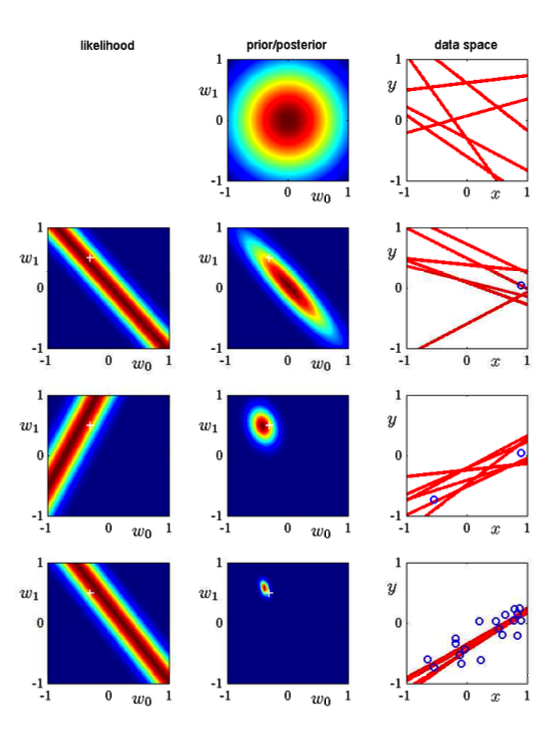

In [84]:
from IPython.display import Image, display
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
display(Image(filename='3-7.png'))

### Predictive distribution
Consider 
$$p(t \mid \mathbf{t}, \alpha, \beta) = \int p(t\mid \mathbf{w}, \beta)p(\mathbf{w}\mid \mathbf{t}, \alpha, \beta)d\mathbf{w}$$

We have that 
$$p(t \mid \mathbf{x, t}, \alpha, \beta) = \mathcal{N}(t\mid \mathbf{m}^T_N\phi(\mathbf{x}), \sigma^2_N(\mathbf{x}))$$

in which $$\sigma^N(\mathbf{x}) = \frac{1}{\beta} + \phi(\mathbf{x})^T\mathbf{S}_N\phi(\mathbf{x})$$

it can be proved that $\sigma^2_{N + 1}(\mathbf{x}) \leq \sigma^2_{N}(\mathbf{x})$ since as the number data points increases, the posterior distribubtion will become narrower.

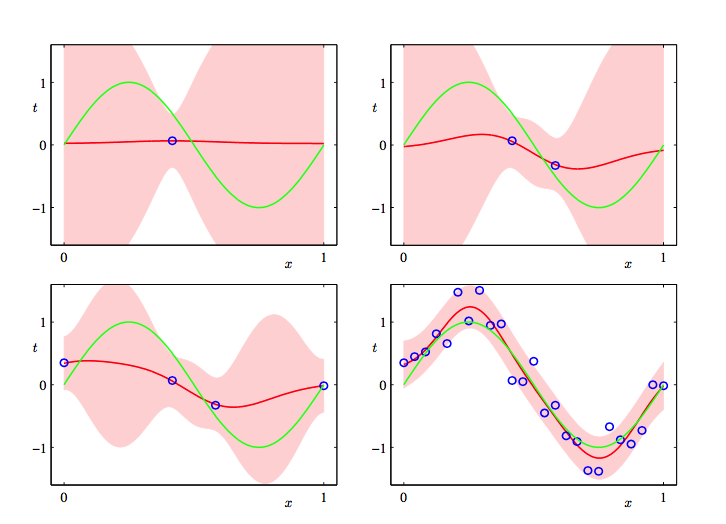

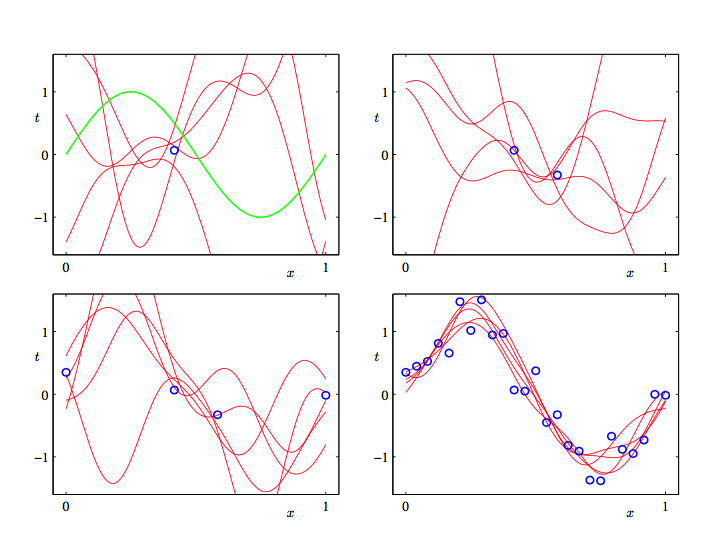

In [83]:
display(Image(filename='3-8.png'))
display(Image(filename='3-9.png'))